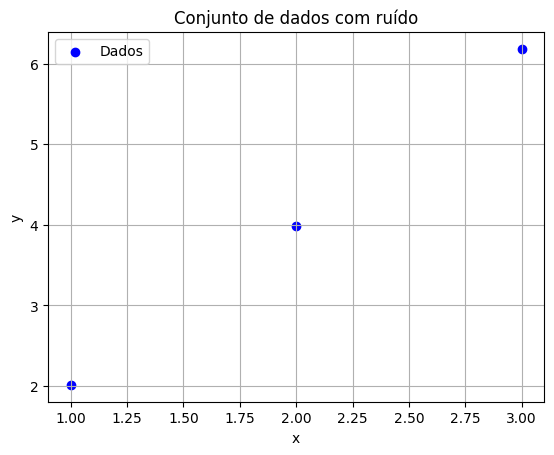

Época 1 | Custo: 29.6291 | w: 2.5445 | b: -0.5277
Época 2 | Custo: 0.3950 | w: 2.2827 | b: -0.6279
Época 3 | Custo: 0.0440 | w: 2.3053 | b: -0.6034
Época 4 | Custo: 0.0381 | w: 2.2970 | b: -0.5928
Época 5 | Custo: 0.0363 | w: 2.2922 | b: -0.5810
Época 6 | Custo: 0.0347 | w: 2.2872 | b: -0.5697
Época 7 | Custo: 0.0332 | w: 2.2823 | b: -0.5586
Época 8 | Custo: 0.0318 | w: 2.2775 | b: -0.5477
Época 9 | Custo: 0.0304 | w: 2.2729 | b: -0.5372
Época 10 | Custo: 0.0291 | w: 2.2684 | b: -0.5269
Época 11 | Custo: 0.0278 | w: 2.2639 | b: -0.5168
Época 12 | Custo: 0.0266 | w: 2.2596 | b: -0.5070
Época 13 | Custo: 0.0255 | w: 2.2554 | b: -0.4974
Época 14 | Custo: 0.0244 | w: 2.2513 | b: -0.4880
Época 15 | Custo: 0.0234 | w: 2.2473 | b: -0.4789
Época 16 | Custo: 0.0224 | w: 2.2433 | b: -0.4700
Época 17 | Custo: 0.0214 | w: 2.2395 | b: -0.4613
Época 18 | Custo: 0.0205 | w: 2.2358 | b: -0.4528
Época 19 | Custo: 0.0197 | w: 2.2321 | b: -0.4445
Época 20 | Custo: 0.0189 | w: 2.2286 | b: -0.4365
Época 21

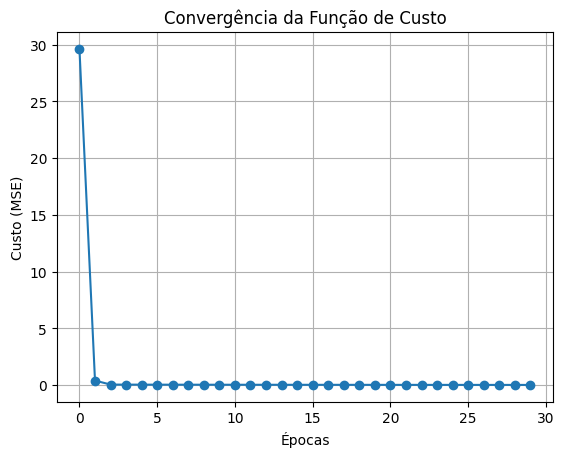

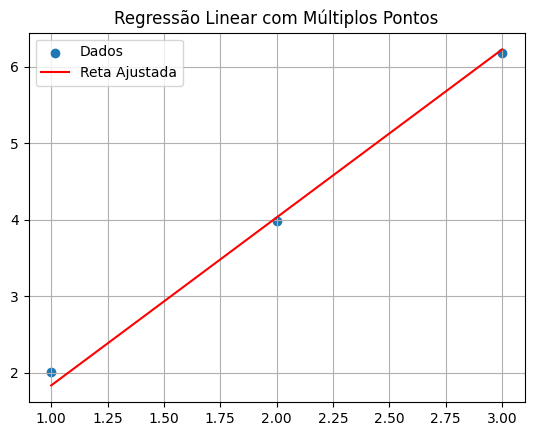


📌 Parâmetros finais:
w (inclinação): 2.1974
b (viés): -0.3656


In [1]:
# 🎯 Etapa 1: Importar bibliotecas
import torch
import matplotlib.pyplot as plt

# 📦 Etapa 2: Criar dados sintéticos com ruído
X = torch.tensor([[1.], [2.], [3.]])
Y = torch.tensor([[2.], [4.], [6.]]) + torch.randn(3, 1) * 0.2

# 💡 Visualização inicial
plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Dados')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de dados com ruído")
plt.legend()
plt.grid(True)
plt.show()

# 🧱 Etapa 3: Inicializar parâmetros
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# 🧮 Função de previsão
def forward(x):
    return w * x + b

# 📉 Função de custo: média da perda quadrática
def cost(y_hat, y):
    return torch.mean((y_hat - y)**2)

# 🔁 Etapa 4: Treinamento com batch gradient descent
learning_rate = 0.1
n_epochs = 30
costs = []

for epoch in range(n_epochs):
    y_pred = forward(X)
    loss = cost(y_pred, Y)
    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_()
        b.grad.zero_()
        costs.append(loss.item())

    print(f"Época {epoch+1} | Custo: {loss.item():.4f} | w: {w.item():.4f} | b: {b.item():.4f}")

# 📈 Etapa 5: Visualização da curva de custo
plt.plot(costs, marker='o')
plt.title("Convergência da Função de Custo")
plt.xlabel("Épocas")
plt.ylabel("Custo (MSE)")
plt.grid(True)
plt.show()

# 🔮 Etapa 6: Visualização da reta ajustada
with torch.no_grad():
    y_pred_final = forward(X)
    plt.scatter(X.numpy(), Y.numpy(), label="Dados")
    plt.plot(X.numpy(), y_pred_final.numpy(), color='red', label="Reta Ajustada")
    plt.title("Regressão Linear com Múltiplos Pontos")
    plt.legend()
    plt.grid(True)
    plt.show()

# ✅ Etapa 7: Resultado final
print("\n📌 Parâmetros finais:")
print(f"w (inclinação): {w.item():.4f}")
print(f"b (viés): {b.item():.4f}")
